In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay,
    roc_curve,
    roc_auc_score,
    RocCurveDisplay
)
import matplotlib.pyplot as plt

In [31]:
digits = load_digits()
X = digits.data
y = digits.target

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size =0.3, random_state=42)

In [34]:
dtc = DecisionTreeClassifier(criterion='entropy')
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [35]:
y_pred = dtc.predict(X_test)

In [36]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred, average = 'weighted')}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted')}")
print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted')}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Accuracy: 0.9841269841269841
Precision: 0.9846230158730159
Recall: 0.9841269841269841
F1 Score: 0.9841269841269841
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       124
           1       1.00      0.97      0.98       128

    accuracy                           0.98       252
   macro avg       0.98      0.98      0.98       252
weighted avg       0.98      0.98      0.98       252



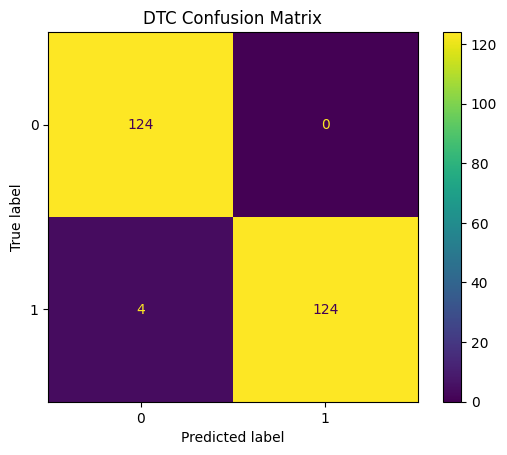

In [37]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.title('DTC Confusion Matrix')
plt.show()

In [40]:
y_probs = dtc.predict_proba(X_test)[:,1]

In [32]:
mask = (y==0) | (y==1)
X = X[mask]
y = y[mask]

In [41]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

In [42]:
auc = roc_auc_score(y_test, y_probs)
print(f"AUC: {auc}")

AUC: 0.984375


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_plot/roc_curve.py:189: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


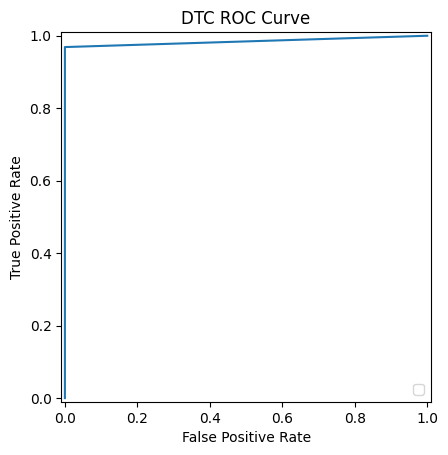

In [43]:
RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.title('DTC ROC Curve')
plt.show()